##K-Means

K-Means clustering intends to partition n objects into k clusters in which each object belongs to the cluster with the nearest mean. This method produces exactly k different clusters of greatest possible distinction. The best number of clusters k leading to the greatest separation (distance) is not known as a priori and must be computed from the data. 

Algorithm		
1.. Clusters the data into k groups where k  is predefined.
2.. Select k points at random as cluster centers.
3.. Assign objects to their closest cluster center according to the Euclidean distance function.
4.. Calculate the centroid or mean of all objects in each cluster.
5.. Repeat steps 2, 3 and 4 until the same points are assigned to each cluster in consecutive rounds.

K-Means is relatively an efficient method. However, we need to specify the number of clusters, in advance and the final results are sensitive to initialization and often terminates at a local optimum. Unfortunately there is no global theoretical method to find the optimal number of clusters. A practical approach is to compare the outcomes of multiple runs with different k and choose the best one based on a predefined criterion. In general, a large k probably decreases the error but increases the risk of overfitting.

In [1]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np
import matplotlib.animation as animation
import time

In [2]:
x=np.array([[1,2],
           [1.5,1.8],
           [5,8],
           [8,8],
           [1,0.6],
           [9,11]])

In [3]:
x=np.array([[2,10],
           [2,5],
           [8,4],
           [5,8],
           [7,5],
           [6,4],
           [1,2],
           [4,9]])

<function matplotlib.pyplot.show(*args, **kw)>

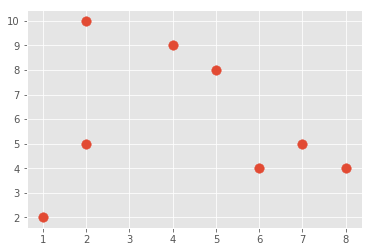

In [4]:
plt.scatter(x[:,0],x[:,1],s=90,marker='o')
plt.show

In [5]:
colors=10*['r','g','b','y']

In [6]:
class K_means:
    list=[]
    def __init__(self, k=2,tol=0.001,max_iter=300): #'''why is max_iter=300?'''
        self.k=k
        self.tol=tol
        self.max_iter=max_iter
        
        #we will use this dictionay to collect the x and y co-ordinates of the centroids as we move ahead.
        self.collection={}
        
        #used to run the loop one more time after the optimaization is complete (not necessary though)
        self.run_once_more=True
        
    def fit(self,data):
        #initialize centroids as empty dictionary
        #in this dictionary we'll have k-keys corresponding to k-groups
        #each group will have a centroid which we'll store in the values of those keys
        
        self.centroids={}
        
        #take first two points as centroids (any random points would do but taking 1st k points makes it easier)
        for i in range(self.k):
            self.centroids[i]=data[i]              #taking 1st two points #self.centroids=[[1,2],[1.5,1.8]]
            self.collection[i]=[[] for m in range(2)]
            
            #takes and store the initial x and y co-ordinates store them in our wonderful collection of centroids
            self.collection[i][0].append(self.centroids[i][0])
            self.collection[i][1].append(self.centroids[i][1])
            
        #this loop will run maximum 300 times, see the class constructor 
        for i in range(self.max_iter):
            self.classifications={}
            
            for i in range(self.k):
                #initialize classifications for every group as empty list (classifications are nothing but groups)
                self.classifications[i]=[]           #{0:[],1:[]}
                #self.collection[i]=[[] for m in range(2)]
                #print self.collection
                
                
                
            for featureset in data:                  #featureset = point
                #take each point from the dataset and calculate it's distance with the two randomly selected points
                #store the two distances in a list
                
                distances=[np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                
                #now the index of the minimum distance will tell us which group the point belongs to, so store the index
                #so add that point into that group's list
                #{0:[points will be append here],1:[or here]}
                
                classification=distances.index(min(distances))
                self.classifications[classification].append(featureset)
            
            #store the two randomly selected points so that they can be used later
            prev_centroids=dict(self.centroids)          #here the dict keyword is unnecessary

            for classification in self.classifications:
                #now for each group there are points appended in their list(see line 32)
                #now it's time to calculate the new centroids, this is done by taking average of all points and saving them
                #into the centroids dictionary(where we had taken two random values initially, now we'll take this average)
                
                self.centroids[classification]=np.average(self.classifications[classification],axis=0)
                
                #now since the new centroids are calculated for each group, we'll store the x and y co-ordinates in seperate lists
                #for each group
                #eg: {
                #     0: [[1.0, 1.0, 1.1666666666666667, 1.1666666666666667, 1.1666666666666667],
                #         [2.0, 2.0, 1.4666666666666666, 1.4666666666666666, 1.4666666666666666]],
                #    1: [[1.5, 4.9, 7.333333333333333, 7.333333333333333, 7.333333333333333],
                #        [1.8, 5.880000000000001, 9.0, 9.0, 9.0]]
                #   }
                self.collection[classification][0].append(self.centroids[classification][0])
                self.collection[classification][1].append(self.centroids[classification][1])
                
                

            optimized=True

            for c in self.centroids:
                #store the previours values in a different list (see line 41)
                orignal_centroid=prev_centroids[c]
                current_centroid=self.centroids[c]
                
                #if the change in position of the new centorid from the previous centroid is more than tolerance then
                #then we need to optimize it further, hence optimized=False meaning more optimization has to be done.
                if np.sum((self.centroids[c]-orignal_centroid)/orignal_centroid*100)>self.tol:
                    optimized=False
            
            #if sufficiently optimized then stop
            if optimized:
                if self.run_once_more:
                    break
                else:
                    self.run_once_more=True
            
    def predict(self,data):
        #now to predict from test data points, we calculate the distance of the test point with the centroids of each group
        #whichever group's centroid has minimum distance with the test point, that group is returnd as the answer
        
        distances=[np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification=distances.index(min(distances))
        return classification
    
    def plot_centroid(self):
        '''now is the time put our precious collection on display'''
        #we enter each group(like a boss) and plot the x and y co-ordinates.
        for classification in self.collection:
            plt.scatter(self.collection[classification][0],self.collection[classification][1])
            plt.plot(self.collection[classification][0],self.collection[classification][1])
        plt.show
    

In [15]:
clf=K_means(k=3)
clf.fit(x)
clf.collection

{0: [[2, 3.6666666666666665, 3.6666666666666665], [10, 9.0, 9.0]],
 1: [[2, 1.5, 1.5], [5, 3.5, 3.5]],
 2: [[8, 7.0, 7.0], [4, 4.333333333333333, 4.333333333333333]]}

In [8]:
clf.fit(x)

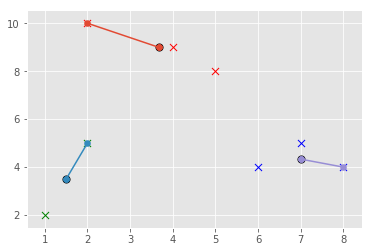

In [9]:
#this block is to show how the centorid is moving/shifting as the program progresses

for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1], marker='o', color='k',s=50,linewidth=1)

for classification in clf.classifications:
    color=colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0],featureset[1],marker='x',color=color,s=50,linewidth=1)
clf.plot_centroid()

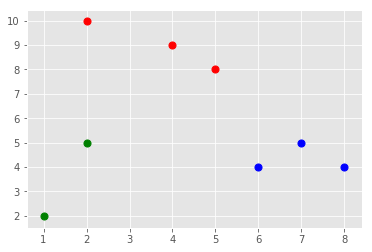

In [10]:
for classification in clf.classifications:
    color=colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0],featureset[1],marker='o',color=color,s=50,linewidth=1)
#clf.plot_centroid()

In [11]:
clf.predict([7,8])

0